In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle

In [4]:
simple_w_o = "extracted_data/simple_without_schaffers.pkl"

with open(simple_w_o, 'rb') as f:
    populations_runs_simple_w_o_bent = pickle.load(f)

ValueError: unsupported pickle protocol: 3

In [3]:
simple_with = "extracted_data/simple_with_clustering_Schaffers.pkl"

with open(simple_with, 'rb') as f:
    populations_runs_simple_w_bent = pickle.load(f)

In [129]:
def test_for_diversity(population):
    
    results = []
    centroid = np.mean(population, axis=0)
    
    for i in range(0, population.shape[0]):
        eucl_dist = np.linalg.norm(centroid-population[i])
        results.append(eucl_dist)

    return sum(results) / len(results)

In [130]:
def diversity_of_run(populations):
    change_in_diversity = []
    for i in range(0, populations.shape[0]):
        diversity = test_for_diversity(populations[i])
        change_in_diversity.append(diversity)
        
    return np.asarray(change_in_diversity)

In [131]:
def get_mean_over_runs(populations_runs):
    diversity_over_runs = np.zeros((0, populations_runs[0].shape[0]))

    for i in range(0, len(populations_runs)):
        populations = populations_runs[i]
        
        change_in_diversity = diversity_of_run(populations)
        
        diversity_over_runs = np.append(diversity_over_runs, np.reshape(change_in_diversity, (1, populations_runs[0].shape[0])), axis=0)
    
    return diversity_over_runs

In [132]:
diversity_runs_with = get_mean_over_runs(populations_runs_simple_w_bent)
diversity_runs_wo = get_mean_over_runs(populations_runs_simple_w_o_bent)

mean_diversity_with = np.mean(diversity_runs_with, axis=0)
mean_diversity_wo = np.mean(diversity_runs_wo, axis=0)


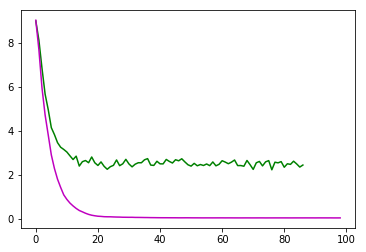

In [134]:
plt.plot(mean_diversity_with, 'g') # plotting t, a separately 
plt.plot(mean_diversity_wo, 'm') # plotting t, b separately 
plt.savefig('sophist_w_wo_bent.png')
plt.show()

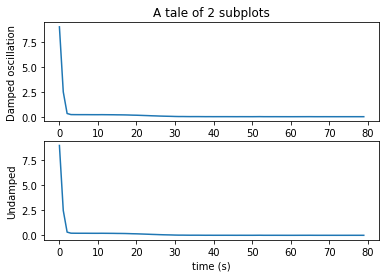

In [75]:
# Plots for paper

plt.subplot(2, 1, 1)
plt.plot(mean_diversity)
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(mean_diversity)
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

In [14]:
print np.min(populations)
print np.max(populations)
print populations.shape

-5.0
5.0
(87, 100, 10)


In [15]:
n_components=2

pca = PCA(n_components)

populations_pca_3 = np.zeros((0, 100, n_components), np.float64)

for population in populations:
    pca.fit(population)
    population_3d = pca.transform(population)
    populations_pca_3 = np.append(populations_pca_3, np.reshape(population_3d, (1, 100, n_components)), axis=0)

In [16]:
populations_pca_3 = np.insert(populations_pca_3, 2, 0.0, axis=2)

In [17]:
for i in range(populations_pca_3.shape[0]):
    populations_pca_3[i][:, 2] = i 

In [18]:
populations_reshape = np.reshape(populations_pca_3, (populations_pca_3.shape[0]*100, 3))

In [126]:
populations_pca_3.shape

(666, 100, 3)

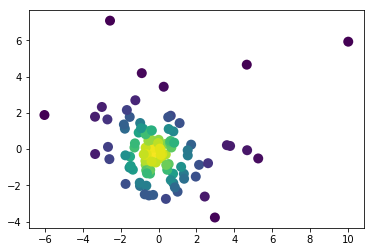

In [24]:
from scipy.stats import gaussian_kde

population_3d = populations_pca_3[8]

x = population_3d[:, 0]
y = population_3d[:, 1]
# z = population_3d[:, 2]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.show()

In [14]:
# TODO: plot the diversity measure over the generations

In [74]:
test_for_diversity(np.asarray([[4, 4, 4], [3, 3, 3], [4, 4, 4]]))

0.7698003589195012

In [143]:
change_in_diversity = []
for i in range(0, 90):
    diversity = test_for_diversity(populations[i])
    change_in_diversity.append(diversity)

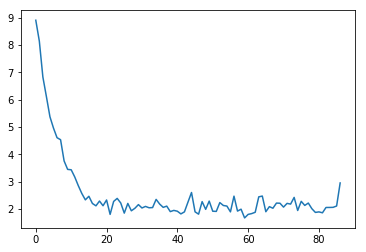

In [81]:
plt.plot(change_in_diversity)
plt.show()

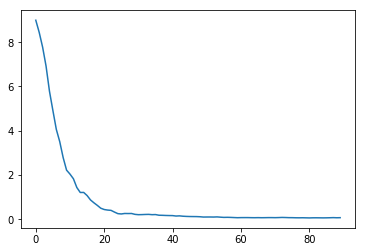

In [144]:
plt.plot(change_in_diversity)
plt.show()